In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV



def df_confusion(label,pred):
    """
    transfer confusion matrix to data frame
    :param label: ground truth label
    :param pred: predicted label
    :return: DataFrame
    """
    return pd.DataFrame(confusion_matrix(label, pred,labels=['G2',"M"]),columns=['pred_G2','pred_M'],index=['ground_true_G2','ground_true_M'])

def check_classifier(clf,x_train,x_test,y_train,y_test):
    """
    check the accuracy of selected classifier with train and test set, also get the confusion matrix to show the prediction label with ground truth label
    :param clf: classifier
    :param x_train: train features
    :param x_test: test features
    :param y_train: ground truth label of training set
    :param y_test:  ground truth label of test set
    :return: hemtmap of confusion matrix
    """
    clf_hp=make_pipeline(StandardScaler(),clf)
    clf_hp.fit(x_train,y_train)
    predicted_train = clf_hp.predict(x_train)
    accuracy_train = accuracy_score(y_train,predicted_train)
    print(f'the accuracy of model run with train data {accuracy_train}')
    predicted_test = clf_hp.predict(x_test)
    accuracy_test = accuracy_score(y_test,predicted_test)
    print(f'the accuracy of model run with test data {accuracy_test}')
    cm_train = df_confusion(y_train,predicted_train)
    cm_test = df_confusion(y_test, predicted_test)
    CM=[cm_train,cm_test]
    title=['train_data','test_data']
    fig, axs= plt.subplots(ncols=1,nrows=2,figsize=(8,5))
    for index,cm  in enumerate(CM):
        axs[index].set_title(f'{title[index]}')
        sns.heatmap(cm, annot=True,fmt='g',ax=axs[index])
    plt.show()

def preprecess_classifier(data,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed'):
    """
    preprocessing of data
    :param data: DataFrame
    :param features: the interesting columns using to classifier
    :param label: ground truth label
    :return: x_train,x_test,y_train,y_test
    """
    X,Y=data[features],data[[label]]
    x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=2/3,random_state=42,shuffle=True,stratify=Y)
    y_train=np.ravel(y_train)
    y_test=np.ravel(y_test)
    # define the classifier
    clf_svm = svm.SVC( random_state=24,C=10,gamma='auto',kernel='poly')
    clf_log=LogisticRegression(random_state=42,C=10,solver='newton-cg',max_iter=10000)
    clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
    clf_sgd=SGDClassifier(loss="log_loss", penalty="l2", max_iter=10000)
    x=[i for i in range(1,6)]
    # using the cross validation to compare different  clf

    CLF=[clf_svm,clf_log,clf_rf,clf_sgd]
    for clf in CLF:
        clf_tem=make_pipeline(StandardScaler(),clf)
        score=cross_val_score(clf_tem,x_train,y_train,cv=5)
        plt.plot(x, score, label =f"{clf}")
        print(f'the selected model: {clf}  Score:{score}  Mean:{score.mean()}')
    plt.legend()
    plt.show()
    return x_train,x_test,y_train,y_test

def merge_data(df1,df2,merge_clue,megre_columns):
    all_merged_df=pd.DataFrame()
    for i in df1[merge_clue].unique().tolist():

        merged_df = pd.merge(df1[df1[merge_clue]==i], df2[df2[merge_clue]==i],how='right',on=megre_columns).dropna()
        all_merged_df=pd.concat([all_merged_df,merged_df])
    return all_merged_df


In [23]:
df_ori=pd.read_csv('/Users/haoranyue/Desktop/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS/single_cell_data/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_final_data.csv')
df=pd.read_csv('/Users/haoranyue/Downloads/221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1_U2OS_singlecell_cellcycle.csv')

In [24]:
df.columns

Index(['Unnamed: 0', 'experiment', 'plate_id', 'well', 'well_id', 'image_id',
       'cell_line', 'condition', 'Cyto_ID', 'area_cell',
       'intensity_mean_EdU_cyto', 'intensity_mean_H3P_cyto', 'nuclei_count',
       'area_nucleus', 'DAPI_total', 'EdU_mean', 'H3P_mean', 'EdU_mean_corr',
       'H3P_mean_corr', 'DAPI_total_norm', 'DAPI_total_norm_log2',
       'EdU_mean_corr_norm', 'EdU_mean_corr_norm_log2', 'H3P_mean_corr_norm',
       'H3P_mean_corr_norm_log2', 'area_cell_norm', 'area_cell_norm_log2',
       'area_nucleus_norm', 'area_nucleus_norm_log2', 'cell_cycle_detailed',
       'cell_cycle'],
      dtype='object')

In [25]:
df_ori.columns

Index(['Unnamed: 0', 'experiment', 'plate_id', 'well', 'well_id', 'image_id',
       'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus', 'Cyto_ID',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell', 'area_cyto', 'intensity_max_DAPI_cyto',
       'intensity_mean_DAPI_cyto', 'intensity_max_EdU_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell',
       'intensity_mean_EdU_cell', 'intensity_max_EdU_cyto',
       'intensity_mean_EdU_cyto', 'intensity_max_H3P_nucleus',
       'intensity_mean_H3P_nucleus', 'intensity_max_H3P_cell',
       'intensity_mean_H3P_cell', 'intensity_max_H3P_cyto',
       'intensity_mean_H3P_cyto', 'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto'],
      dtype='object')

In [26]:
df_all=merge_data(df1=df_ori,df2=df,merge_clue='well_id',megre_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed,cell_cycle
0,0.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,13.0,136.0,...,0.968335,-0.046422,0.949624,-0.074571,1.462911,0.548842,1.120828,0.164565,G2,G2/M
1,1.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,16.0,147.0,...,0.917730,-0.123858,0.929528,-0.105430,2.604441,1.380974,1.211483,0.276774,G1,G1
2,2.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,17.0,98.0,...,4.848917,2.277662,0.985389,-0.021235,1.033012,0.046856,0.807655,-0.308188,Late S,S
3,5.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,20.0,203.0,...,1.000066,0.000095,0.952695,-0.069913,1.938723,0.955107,1.673000,0.742438,Polyploid,Polyploid
4,4.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,A0,9683,354372.0,MM231,NT,19.0,130.0,...,1.003778,0.005440,0.969189,-0.045151,1.755076,0.811534,1.071380,0.099470,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,262.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,304.0,314.0,...,0.968910,-0.045565,0.985267,-0.021413,1.205830,0.270027,1.851099,0.888382,G2,G2/M
1783,261.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,303.0,246.0,...,2.431181,1.281657,1.023444,0.033433,1.647256,0.720065,1.450224,0.536276,Late S,S
1784,265.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,308.0,309.0,...,1.039146,0.055399,0.993885,-0.008849,1.224424,0.292103,1.821623,0.865224,G2,G2/M
1785,267.0,221011_Cellcycleprofile_Exp3_siRNAs_MM231_RPE1...,928,D3,9640,354381.0,RPE-1,siCycA2,311.0,473.0,...,1.100063,0.137586,1.009845,0.014134,2.805569,1.488294,2.788439,1.479458,Polyploid,Polyploid


In [27]:
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771,...,22771,22771,22771,22771,22771,22771,22771,22771,22771,22771
G1,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081,...,70081,70081,70081,70081,70081,70081,70081,70081,70081,70081
G2,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261,...,26261,26261,26261,26261,26261,26261,26261,26261,26261,26261
Late S,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347,...,14347,14347,14347,14347,14347,14347,14347,14347,14347,14347
M,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,...,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
Polyploid,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982,...,3982,3982,3982,3982,3982,3982,3982,3982,3982,3982
Polyploid (replicating),1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,...,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
Sub-G1,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640,...,1640,1640,1640,1640,1640,1640,1640,1640,1640,1640


In [28]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(2156)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell',
       'intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)

In [29]:
data

,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,integrated_int_DAPI,area_cell,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,...,intensity_mean_Tub_cell,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,nuclei_count,DAPI_total,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,MM231,NT,313.0,105.0,59672.353501,29105.077359,3.056033e+06,148.0,59672.353501,22281.894930,...,6246.185057,7910.301739,5495.790635,1,3.056033e+06,5.002511,1.217894,0.308860,0.865345,G2
1,MM231,NT,490.0,162.0,19649.189142,14119.666572,2.287386e+06,912.0,19649.189142,4235.612228,...,14525.247744,27954.017923,14409.504494,1,2.287386e+06,3.744290,0.999669,1.903246,1.335104,G2
2,U2OS,NT,1230.0,230.0,16144.604546,10481.014470,2.410633e+06,899.0,16144.604546,4047.009104,...,4858.270376,10016.807190,4830.975995,1,2.410633e+06,3.417127,1.018177,1.400424,1.400322,G2
3,MM231,NT,586.0,109.0,28280.035142,20401.258609,2.223737e+06,434.0,28280.035142,8256.831010,...,11167.546682,18203.836515,10719.374358,1,2.223737e+06,3.640101,1.060227,0.905711,0.898311,G2
4,MM231,NT,291.0,170.0,21058.270328,14281.560167,2.427865e+06,927.0,21058.270328,4387.128731,...,10690.223209,21686.338592,10316.273433,1,2.427865e+06,3.974244,0.967546,1.934549,1.401035,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,RPE-1,siCdc27,230.0,389.0,7777.567821,5641.206693,2.194429e+06,3601.0,7777.567821,1652.194070,...,7120.659097,16687.058234,6728.585846,1,2.194429e+06,4.129064,0.993282,2.479837,2.293240,G2
4308,U2OS,NT,454.0,229.0,17010.656589,12449.583418,2.850955e+06,612.0,17010.656589,6201.222200,...,6664.478028,11537.805740,6799.816432,1,2.850955e+06,4.041293,1.007080,0.953348,1.394233,G2
4309,RPE-1,siCtr,355.0,186.0,15101.850319,10051.958056,1.869664e+06,936.0,15101.850319,3278.938535,...,8874.806350,18277.803786,9034.760881,1,1.869664e+06,3.517982,1.019137,0.644579,1.096511,M
4310,MM231,siCdc27,260.0,146.0,34221.001749,15625.916335,2.281384e+06,597.0,34221.001749,5577.942874,...,14912.523979,39949.290718,12195.005846,1,2.281384e+06,3.734465,1.092868,1.245875,1.203242,M


# input data (2569 G2 cell + 2569 M cell)

the selected model: SVC(C=10, gamma='auto', kernel='poly', random_state=24)  Score:[0.95130435 0.94086957 0.93565217 0.92347826 0.96167247]  Mean:0.9425953643387366
the selected model: LogisticRegression(C=10, max_iter=10000, random_state=42, solver='newton-cg')  Score:[0.9373913  0.94956522 0.92173913 0.92869565 0.94947735]  Mean:0.9373737312528405
the selected model: RandomForestClassifier(n_estimators=40, random_state=11)  Score:[0.94782609 0.94608696 0.94434783 0.93043478 0.95470383]  Mean:0.9446798969853052
the selected model: SGDClassifier(loss='log_loss', max_iter=10000)  Score:[0.94086957 0.93913043 0.92521739 0.93391304 0.94947735]  Mean:0.937721557339797


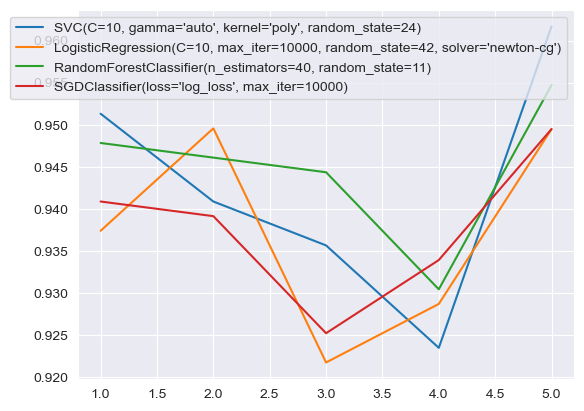

In [30]:
x_train,x_test,y_train,y_test =preprecess_classifier(data=data)

In [31]:
#using the GridSearchCV to select the best hyperparameters

clf_svm = svm.SVC( random_state=24,C=10,gamma='auto')
clf_svm_hp =GridSearchCV(clf_svm,{'C':[0.1,10,100],"gamma":['scale','auto'],'decision_function_shape':['ovo','ovr']},cv=5,return_train_score=True)
clf_svm_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_svm_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130307,0.001878,0.049818,0.000330,0.1,ovo,scale,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.561739,0.575652,...,0.559496,0.011034,5,0.558504,0.558069,0.560244,0.566768,0.560435,0.560804,0.003124
1,0.102776,0.000674,0.044594,0.000371,0.1,ovo,auto,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
2,0.130542,0.002882,0.050343,0.001200,0.1,ovr,scale,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.561739,0.575652,...,0.559496,0.011034,5,0.558504,0.558069,0.560244,0.566768,0.560435,0.560804,0.003124
3,0.102977,0.000747,0.044847,0.000235,0.1,ovr,auto,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.499130,0.499130,...,0.499304,0.000348,7,0.500217,0.500217,0.500217,0.500217,1.000000,0.600174,0.199913
4,0.075164,0.001095,0.028555,0.000396,10,ovo,scale,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.916522,0.899130,...,0.900140,0.009681,3,0.895172,0.898652,0.900826,0.901261,0.897826,0.898747,0.002204
5,0.107806,0.002348,0.044821,0.000323,10,ovo,auto,"{'C': 10, 'decision_function_shape': 'ovo', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.075127,0.000891,0.028517,0.000282,10,ovr,scale,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.916522,0.899130,...,0.900140,0.009681,3,0.895172,0.898652,0.900826,0.901261,0.897826,0.898747,0.002204
7,0.107634,0.003364,0.045093,0.000560,10,ovr,auto,"{'C': 10, 'decision_function_shape': 'ovr', 'g...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.048909,0.000574,0.016445,0.000362,100,ovo,scale,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.946087,0.932174,...,0.927280,0.012311,1,0.924315,0.927360,0.930839,0.931274,0.925652,0.927888,0.002765
9,0.107192,0.002569,0.044982,0.000320,100,ovo,auto,"{'C': 100, 'decision_function_shape': 'ovo', '...",0.499130,0.499130,...,0.499304,0.000348,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [32]:
clf_rf = RandomForestClassifier(random_state=11,n_estimators=40)
clf_rf_hp =GridSearchCV(clf_rf,{"n_estimators":[30,40,50,60,70,80,90,100],"criterion":['entropy','log_loss'],'max_features':['sqrt','log2',],'class_weight':['balanced', 'balanced_subsample']},cv=5,return_train_score=True)
clf_rf_hp.fit(x_train,y_train)
df_hp=pd.DataFrame(clf_rf_hp.cv_results_)
df_hp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.095432,0.001879,0.002954,0.000190,balanced,entropy,sqrt,30,"{'class_weight': 'balanced', 'criterion': 'ent...",0.949565,...,0.941895,0.008262,53,1.000000,0.999130,1.000000,0.99913,0.998261,0.999304,0.000651
1,0.123651,0.000812,0.003390,0.000044,balanced,entropy,sqrt,40,"{'class_weight': 'balanced', 'criterion': 'ent...",0.951304,...,0.943286,0.007814,9,0.999565,0.999565,0.999565,1.00000,0.999565,0.999652,0.000174
2,0.153152,0.000786,0.004067,0.000143,balanced,entropy,sqrt,50,"{'class_weight': 'balanced', 'criterion': 'ent...",0.951304,...,0.942591,0.008580,25,1.000000,1.000000,1.000000,1.00000,0.999565,0.999913,0.000174
3,0.183249,0.001470,0.004557,0.000039,balanced,entropy,sqrt,60,"{'class_weight': 'balanced', 'criterion': 'ent...",0.951304,...,0.942242,0.007722,49,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
4,0.213194,0.001302,0.005130,0.000128,balanced,entropy,sqrt,70,"{'class_weight': 'balanced', 'criterion': 'ent...",0.951304,...,0.942243,0.008394,45,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.205188,0.002223,0.004532,0.000052,balanced_subsample,log_loss,log2,60,"{'class_weight': 'balanced_subsample', 'criter...",0.947826,...,0.942593,0.009049,21,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
60,0.240106,0.003349,0.005132,0.000093,balanced_subsample,log_loss,log2,70,"{'class_weight': 'balanced_subsample', 'criter...",0.949565,...,0.941548,0.008822,61,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
61,0.272624,0.001714,0.005718,0.000068,balanced_subsample,log_loss,log2,80,"{'class_weight': 'balanced_subsample', 'criter...",0.951304,...,0.942245,0.009405,33,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
62,0.309837,0.006001,0.006356,0.000043,balanced_subsample,log_loss,log2,90,"{'class_weight': 'balanced_subsample', 'criter...",0.953043,...,0.943636,0.009548,1,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000


# RandomForestClassifier

the accuracy of model run with train data 1.0
the accuracy of model run with test data 0.9506258692628651


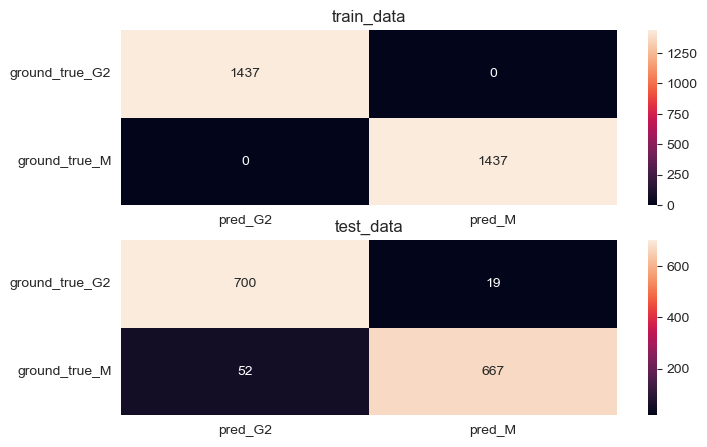

In [36]:
clf_rf_hp = RandomForestClassifier(random_state=11,n_estimators=70,max_features='sqrt',criterion='entropy',class_weight='balanced')
check_classifier(clf=clf_rf_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

# SVM

the accuracy of model run with train data 0.97633959638135
the accuracy of model run with test data 0.9499304589707928


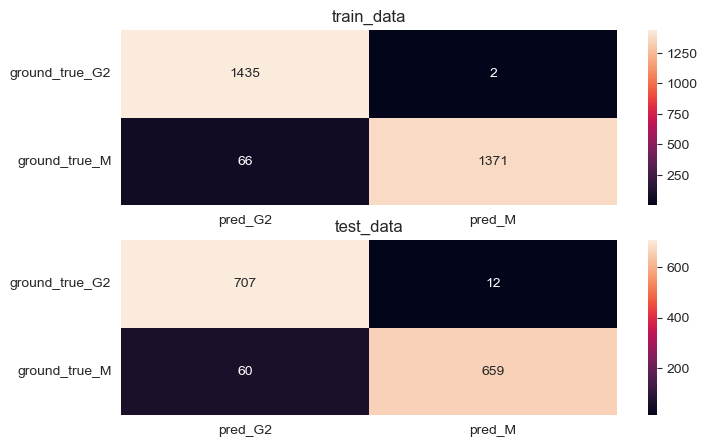

In [34]:
clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo')
check_classifier(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)